In [10]:
from recipe_rec import recipes, unique_ingredients
from recipe_rec.recipe2vec import Recipe2Vec
import itertools
import pickle

# Effect of Alpha and Num. Epochs on Loss Stabilisation

In [14]:
systems = {}

alphas = [0.025, 0.0025, 0.025]
epochs = [10, 100, 300]

losses = {}

for alpha, num_epochs in list(itertools.product(alphas, epochs)):
    systems["recipe2vec"] = Recipe2Vec(
        # model_path="./recipe_rec/data/recipe2vec_42d574c155524a28a8ae6ee691d96e85.model",
        alpha=alpha,
        num_epochs=num_epochs,
        # index_path="./recipe_rec/data/recipe2vec_7153b2f49949474495fd9ffe8b340baf.ann",
        verbose=False,
    )

    training_losses = systems["recipe2vec"].training_losses

    losses[(alpha, num_epochs)] = [1, 2, 3, 4]

INFO - 15:38:59: collecting all words and their counts
INFO - 15:38:59: PROGRESS: at sentence #0, processed 0 words, keeping 0 word types
INFO - 15:38:59: PROGRESS: at sentence #10000, processed 78783 words, keeping 3498 word types
INFO - 15:38:59: PROGRESS: at sentence #20000, processed 156666 words, keeping 4106 word types
INFO - 15:38:59: PROGRESS: at sentence #30000, processed 234118 words, keeping 4459 word types
INFO - 15:38:59: PROGRESS: at sentence #40000, processed 312517 words, keeping 4694 word types
INFO - 15:39:00: PROGRESS: at sentence #50000, processed 392108 words, keeping 4858 word types
INFO - 15:39:00: PROGRESS: at sentence #60000, processed 471699 words, keeping 5007 word types
INFO - 15:39:00: PROGRESS: at sentence #70000, processed 550299 words, keeping 5126 word types
INFO - 15:39:00: PROGRESS: at sentence #80000, processed 631287 words, keeping 5227 word types
INFO - 15:39:00: PROGRESS: at sentence #90000, processed 712934 words, keeping 5395 word types
INFO - 1

KeyboardInterrupt: 

In [12]:
with open("training_losses.pkl", "wb") as f:

    pickle.dump(losses, f)

# Number of Ingredients Per Recipe

In [2]:
recipes["IngredientLen"] = recipes["RecipeIngredientParts"].str.len()

In [3]:
len(recipes[recipes["IngredientLen"] > 19])

4721

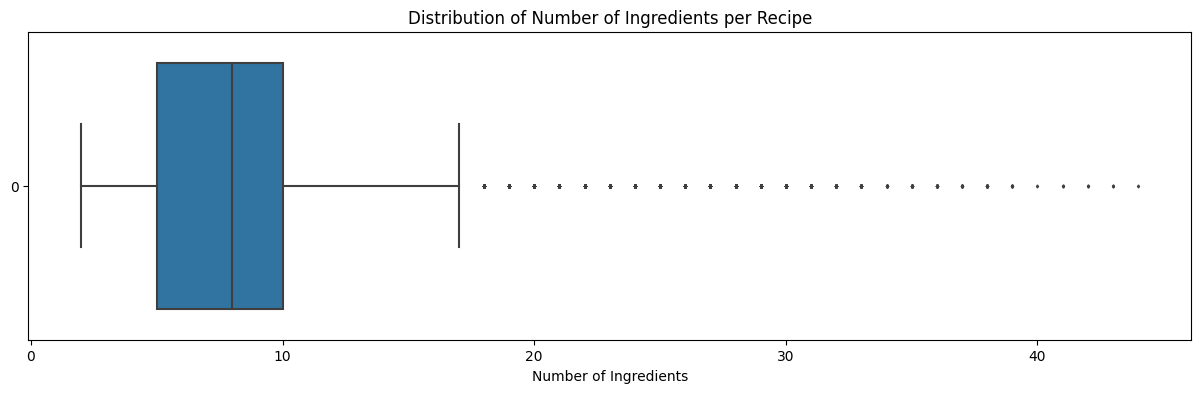

In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(15, 4))
ax = sns.boxplot(recipes["IngredientLen"], fliersize=1.5, orient="h")

ax.set(
    xlabel="Number of Ingredients",
    title="Distribution of Number of Ingredients per Recipe",
)

plt.show()

Statistics:

In [5]:
recipes["IngredientLen"].describe()

count    511626.000000
mean          8.054245
std           3.847504
min           2.000000
25%           5.000000
50%           8.000000
75%          10.000000
max          44.000000
Name: IngredientLen, dtype: float64

In [6]:
recipes["IngredientLen"].median()

8.0

Number of training words:

In [7]:
recipes["IngredientLen"].sum()

4120761

# Ingredient Count Distribution

In [8]:
ingredient_counts = {}

for recipe in recipes["RecipeIngredientParts"]:

    for ingredient in recipe:

        if ingredient in ingredient_counts:

            ingredient_counts[ingredient] += 1

        else:

            ingredient_counts[ingredient] = 1

In [74]:
len(ingredient_counts)

7358

In [56]:
import numpy as np
import pandas as pd

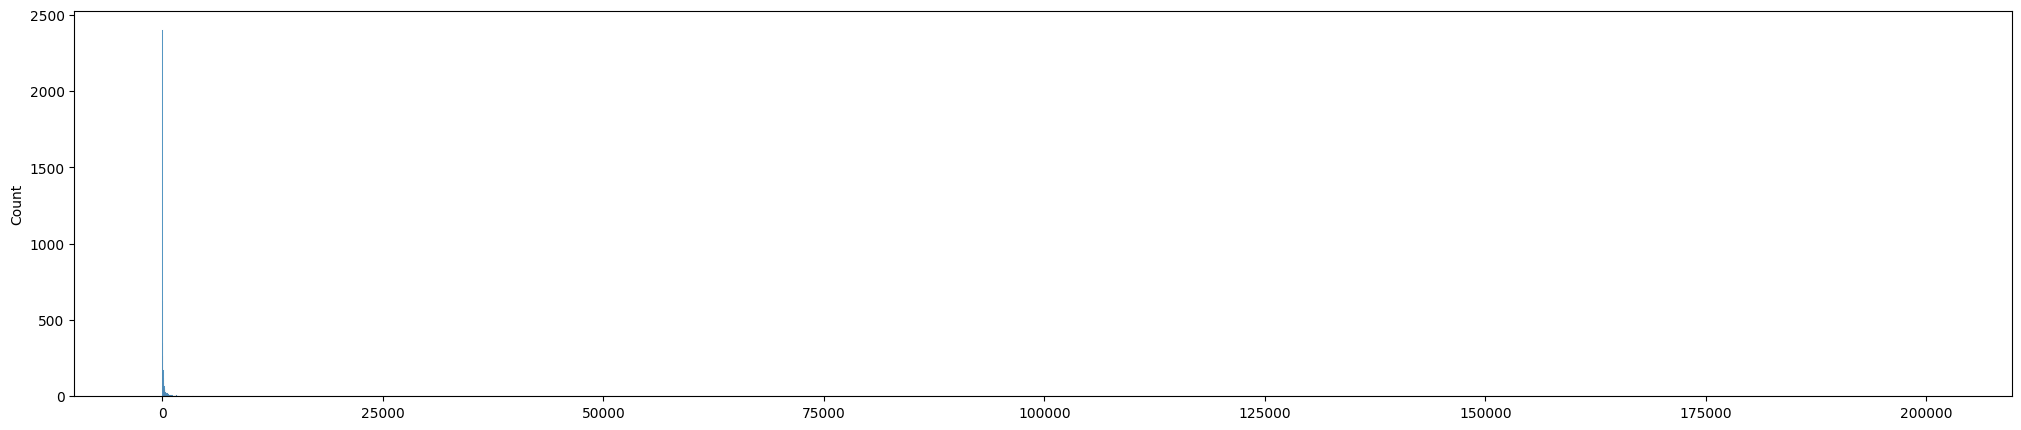

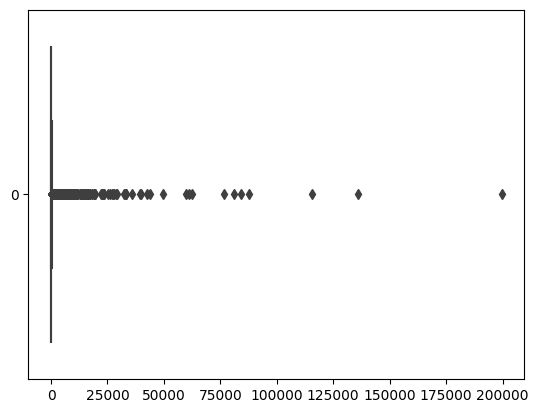

count      7358.000000
mean        560.038190
std        4452.103373
min           1.000000
25%           2.000000
50%          15.000000
75%         112.000000
max      199717.000000
dtype: float64

In [64]:
ingredient_labels = ingredient_counts.keys()
ingredient_counts_y = np.array(list(ingredient_counts.values()))

# ingredient_counts_y = ingredient_counts_y[ingredient_counts_y < np.quantile(ingredient_counts_y, 1.0)]

import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(25, 5))

sns.histplot(
    ingredient_counts_y[ingredient_counts_y > np.quantile(ingredient_counts_y, 0.2)],
    thresh=5,
)
plt.show()
sns.boxplot(ingredient_counts_y, orient="h")
plt.show()

display(pd.Series(ingredient_counts_y).describe())

# Vector Size

In [20]:
import numpy as np

Create co-ocurrence matrix

In [67]:
ingredients = []
ingredient_indexes = {}

recipe_ingredients = recipes["RecipeIngredientParts"]

# get matrix size 
for recipe in recipe_ingredients:
    
    for ingredient in recipe:
        if ingredient not in ingredient_indexes.keys() and :
            
            ingredient_indexes[ingredient] = len(ingredients)
            ingredients.append(ingredient)

In [68]:
len(ingredients)

3631

In [72]:
matrix = np.zeros((len(ingredients), len(ingredients)))

for recipe in recipe_ingredients:

    for ingredient in recipe:

        ingredient_index = ingredient_indexes[ingredient]

        for context_ingredient in recipe:

            context_index = ingredient_indexes[context_ingredient]

            matrix[ingredient_index][context_index] += 1
            matrix[context_index][ingredient_index] += 1

Create word-word cosine similarity matrix using co-ocurrence matrix

In [73]:
from scipy import spatial
import tqdm

similarity_matrix = np.zeros((len(ingredients), len(ingredients)))

# get each row's vector
for i in tqdm.tqdm(range(matrix.shape[0])):

    for j in range(matrix.shape[0]):

        if i == j:

            continue

        # compute similarity
        similarity = 1.0 - spatial.distance.cosine(matrix[i], matrix[j])

        similarity_matrix[i][j] = similarity
        similarity_matrix[j][i] = similarity

100%|██████████| 3631/3631 [10:38<00:00,  5.69it/s]


Save the resulting matrix to disk for re-use:

In [76]:
import pickle

with open("similarity_matrix_trimmed.npy", "wb") as f:
    np.save(f, similarity_matrix, allow_pickle=True)

In [77]:
import tqdm.notebook as tqdm

In [6]:
import numpy as np

with open("similarity_matrix.npy", "rb") as f:
    similarity_matrix = np.load(f)

For each value in the similarity matrix:

In [78]:
import networkx as nx
from networkx.algorithms import approximation


def lambda_lookup_func(i):

    if i == 3 or i == 4:
        return 6
    elif i == 5:
        return 10
    elif i == 6:
        return 16
    elif i >= 7 and i <= 13:
        return 28
    elif i == 14:
        return 30
    elif i == 15:
        return 36
    elif i == 16:
        return 42
    elif i == 17:
        return 51
    elif i == 18:
        return 61
    elif i == 19:
        return 76
    elif i == 20:
        return 96
    elif i == 21:
        return 126
    elif i == 22:
        return 176
    elif i >= 23 and i <= 41:
        return 276
    elif i == 42:
        return 288
    elif i == 43:
        return 344


lambda_lookup = {lambda_lookup_func(i) for i in range(3, 44)}

In [79]:
# build graph
G = nx.Graph()

for i in range(similarity_matrix.shape[0]):
    G.add_node(i)

In [80]:
# get unique similarity values from the similarity matrix
unique_similarities = np.unique(similarity_matrix)

In [81]:
lambdas = []

for val in tqdm.tqdm(unique_similarities, desc="outer", position=0):

    # for each cell in the similarity matrix
    for i in tqdm.tqdm(range(similarity_matrix.shape[0]), desc="inner", position=1):

        for j in range(i + 1):

            if similarity_matrix[i][j] == val:

                G.add_edge(i, j)

    max_clique = approximation.max_clique(G)

    print("got max clique")
    max_clique_size = len(max_clique)

    lambda_k = lambda_lookup[max_clique_size]

    lambdas.append(lambda_k)

    G.clear_edges()

outer:   0%|          | 0/6586847 [00:00<?, ?it/s]

inner:   0%|          | 0/3631 [00:00<?, ?it/s]

: 

: 